In [1]:
import scdrs
import scanpy as sc
from anndata import AnnData
from scipy import stats
import anndata
import pandas as pd
import numpy as np
import anndata
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
import pandas as pd

sc.set_figure_params(dpi=125)
warnings.filterwarnings("ignore")

In [93]:
# #Load the data
# exp_matrix = pd.read_csv("/Users/elanschonfeld/Desktop/Awatramani Lab/LRRK2/expression_matrix.csv", index_col=0)
# cell_metadata = pd.read_csv("/Users/elanschonfeld/Desktop/Awatramani Lab/LRRK2/cell_metadata.csv", index_col=0)
# feature_metadata = pd.read_csv("/Users/elanschonfeld/Desktop/Awatramani Lab/LRRK2/feature_metadata.csv", index_col=0)

In [94]:
# cell_metadata

,orig.ident,nCount_RNA,nFeature_RNA,group,sample,percent.mt,percent.ribo,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,seurat_clusters
AAACCCAAGACGAGCT-1_1,SeuratProject,13537,4191,control,control1,0.066484,0.177292,9509,4064,1,1
AAACCCAAGCCTTTCC-1_1,SeuratProject,19301,4903,control,control1,0.098440,0.124346,9549,3917,4,4
AAACCCACAAGGGTCA-1_1,SeuratProject,11855,4060,control,control1,0.101223,0.151835,9616,4041,17,17
AAACCCACATCCTGTC-1_1,SeuratProject,9752,3637,control,control1,0.143560,0.215340,9237,3634,0,0
AAACCCAGTAGGAGTC-1_1,SeuratProject,7673,3242,control,control1,0.182458,0.156393,8100,3242,0,0
...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAGCGAGTA-1_4,SeuratProject,11456,3908,lrrk2,lrrk2,0.130936,0.235684,8018,3789,2,2
TTTGTTGCATTGCTTT-1_4,SeuratProject,5064,2372,lrrk2,lrrk2,0.296209,0.197472,6377,2375,19,19
TTTGTTGGTAGAGATT-1_4,SeuratProject,8826,3245,lrrk2,lrrk2,0.158622,0.181283,7804,3244,8,8
TTTGTTGTCAATCCGA-1_4,SeuratProject,8724,3226,lrrk2,lrrk2,0.252178,0.286566,7812,3221,7,7


In [133]:
# #Create an AnnData object
# adata = anndata.AnnData(X=exp_matrix.T)
# adata.obs = cell_metadata
# adata.var_names = exp_matrix.index

# #Save as .h5ad
# adata.write_h5ad("/Users/elanschonfeld/Desktop/Awatramani Lab/LRRK2/lrrk2.h5ad")

In [2]:
adata = anndata.read_h5ad("/Users/elanschonfeld/Desktop/Awatramani Lab/LRRK2/lrrk2.h5ad")

In [ ]:
adata

In [91]:
# # load geneset, convert homologs and overlap gene names to adata.var_names
# dict_gs = scdrs.util.load_gs(
#     "/Users/elanschonfeld/Downloads/FUMA_job492038/gene_set.gs",
#     src_species="human",
#     dst_species="mouse",
#     to_intersect=adata.var_names,
# )


# # preprocess data to
# # (1) regress out from covariates
# # (2) group genes into bins by mean and variance
# scdrs.preprocess(adata, n_mean_bin=20, n_var_bin=20, copy=False)

In [42]:
dict_gs

NameError: name 'dict_gs' is not defined

In [66]:
type(dict_gs)

NameError: name 'dict_gs' is not defined

In [4]:
def merge_gs_dicts(*dicts):
    result = {}
    for d in dicts:
        result.update(d)
    return result

gs_files_dirs = ['/Users/elanschonfeld/Desktop/Awatramani Lab/NEW LRRK2/Gene Sets/adhd', '/Users/elanschonfeld/Desktop/Awatramani Lab/NEW LRRK2/Gene Sets/parkinsons', '/Users/elanschonfeld/Desktop/Awatramani Lab/NEW LRRK2/Gene Sets/schizophrenia', '/Users/elanschonfeld/Desktop/Awatramani Lab/NEW LRRK2/Gene Sets/nicotine', '/Users/elanschonfeld/Desktop/Awatramani Lab/NEW LRRK2/Gene Sets/autism', '/Users/elanschonfeld/Desktop/Awatramani Lab/NEW LRRK2/Gene Sets/alzheimers', '/Users/elanschonfeld/Desktop/Awatramani Lab/NEW LRRK2/Gene Sets/bipolar', '/Users/elanschonfeld/Desktop/Awatramani Lab/NEW LRRK2/Gene Sets/new_parkinsons']

#Initialize a list to store the data from each .gs file as dictionaries
gs_dicts = []

for gs_dir in gs_files_dirs:
    gs_files = [f for f in os.listdir(gs_dir) if f.endswith('.gs')]
    for f in gs_files:
        gs_dict = scdrs.util.load_gs(
            os.path.join(gs_dir, f),
            src_species="human",
            dst_species="mouse",
            to_intersect=adata.var_names,
        )
        gs_dicts.append(gs_dict)

full_gs_dict = merge_gs_dicts(*gs_dicts)
print(f"Number of unique genes: {len(full_gs_dict.keys())}")

scdrs.preprocess(adata, n_mean_bin=20, n_var_bin=20, copy=False)

Number of unique genes: 8


In [5]:
full_gs_dict

{'ADHD': (['Hapln4',
   'Lrrtm4',
   'Cilp2',
   'Rwdd4a',
   'Ndufa13',
   'Lrp10',
   'Tm6sf2',
   'Gamt',
   'Slc12a5',
   'Btaf1',
   'Gatad2a',
   'Vrk3',
   'Ndufs7',
   'Apc',
   'Ptpn21',
   'Dock1',
   'Rmdn2',
   'Nsun6',
   'Tssk6',
   'Gmip',
   'Atp13a1',
   'Maff',
   'Catsper4',
   'Mau2',
   'Dmpk',
   'Ncan',
   'Rem2',
   'Cdh19',
   'Asb15',
   'Pbx4',
   'Bsdc1',
   'Spata7',
   'Cd40',
   'Zfp111',
   'Dmwd',
   'Hook1',
   'Psmc3',
   'Lpar2',
   'Cfi',
   'Spi1',
   'Mrpl4',
   'Ncoa5',
   'Kcna3',
   'Kbtbd7',
   'Sugp1',
   'Nras',
   '1700025G04Rik',
   'Sap30l',
   'Acoxl',
   'Grm7',
   'Tmem150c',
   'Ttc21b',
   'Slc35b4',
   'Arid5b',
   'Kcmf1',
   'Cpeb2',
   'Wdr77',
   'Bin1',
   'Ppp2r2a',
   'Slc39a13',
   'Adcy5',
   'Lsm1',
   'Myadm',
   'Ido2',
   'Vash2',
   '4930524B15Rik',
   'Rnf182',
   'Limk2',
   'C9',
   'Brat1',
   'Eif5a2',
   'Trim16',
   'Fgfr1',
   'Pik3ip1',
   'Letm2',
   'Tmem211',
   'Lrrc63',
   'Kcnab3',
   'Ect2',
   'Ctdp1',

In [6]:
dict_df_score = dict()
for trait in full_gs_dict:
    gene_list, gene_weights = full_gs_dict[trait]
    dict_df_score[trait] = scdrs.score_cell(
        data=adata,
        gene_list=gene_list,
        gene_weight=gene_weights,
        ctrl_match_key="mean_var",
        n_ctrl=1000,
        weight_opt="vs",
        return_ctrl_raw_score=False,
        return_ctrl_norm_score=True,
        verbose=False
    )

Computing control scores: 100%|█████████████| 1000/1000 [02:31<00:00,  6.60it/s]


In [3]:
import scanpy as sc

#Normalize data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

#Identify highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

#Scale data to zero mean and unit variance
sc.pp.scale(adata, max_value=10)

#Run PCA
sc.tl.pca(adata, svd_solver='arpack')

#Compute the neighborhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

#Run UMAP
sc.tl.umap(adata)

In [7]:
print(adata.obs.columns)

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'group', 'sample',
       'percent.mt', 'percent.ribo', 'nCount_SCT', 'nFeature_SCT',
       'SCT_snn_res.0.8', 'seurat_clusters'],
      dtype='object')


In [8]:
dict_df_score.keys()

dict_keys(['ADHD', 'PARKINSONS', 'SCHIZOPHRENIA', 'NICOTINE_DEPENDENCE', 'AUTISM', 'ALZHEIMERS', 'BIPOLAR_DISORDER', 'NEW_PARKINSONS'])

In [9]:
# df = dict_df_score['NICOTINE_DEPENDENCE']

# #Select only the norm_score column
# norm_score_df = df[['norm_score']]

# norm_score_df.to_csv('/Users/elanschonfeld/Desktop/Awatramani Lab/NEW LRRK2/nicotine_dependence_metadata.csv')

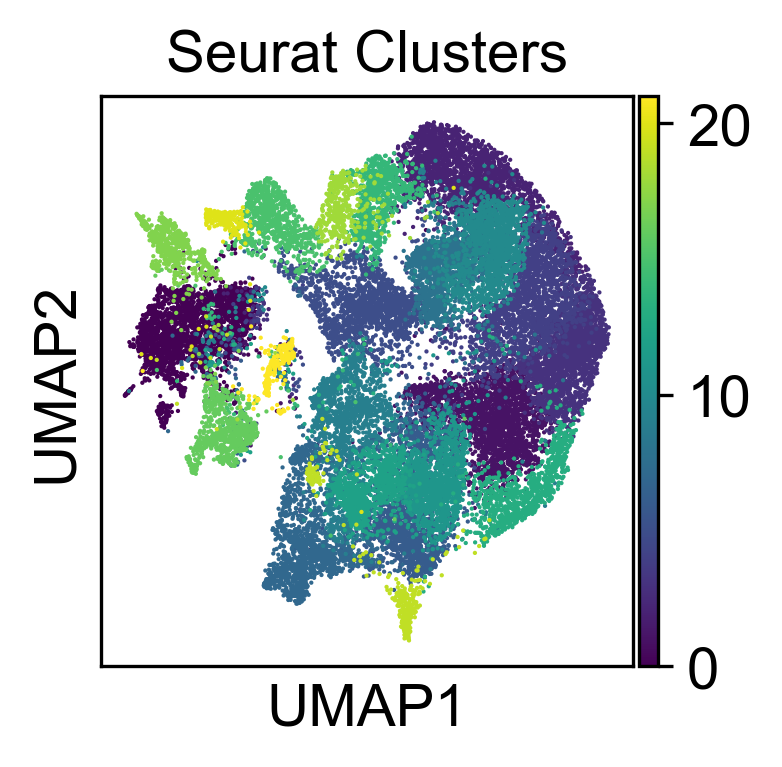

<Figure size 1500x1500 with 0 Axes>

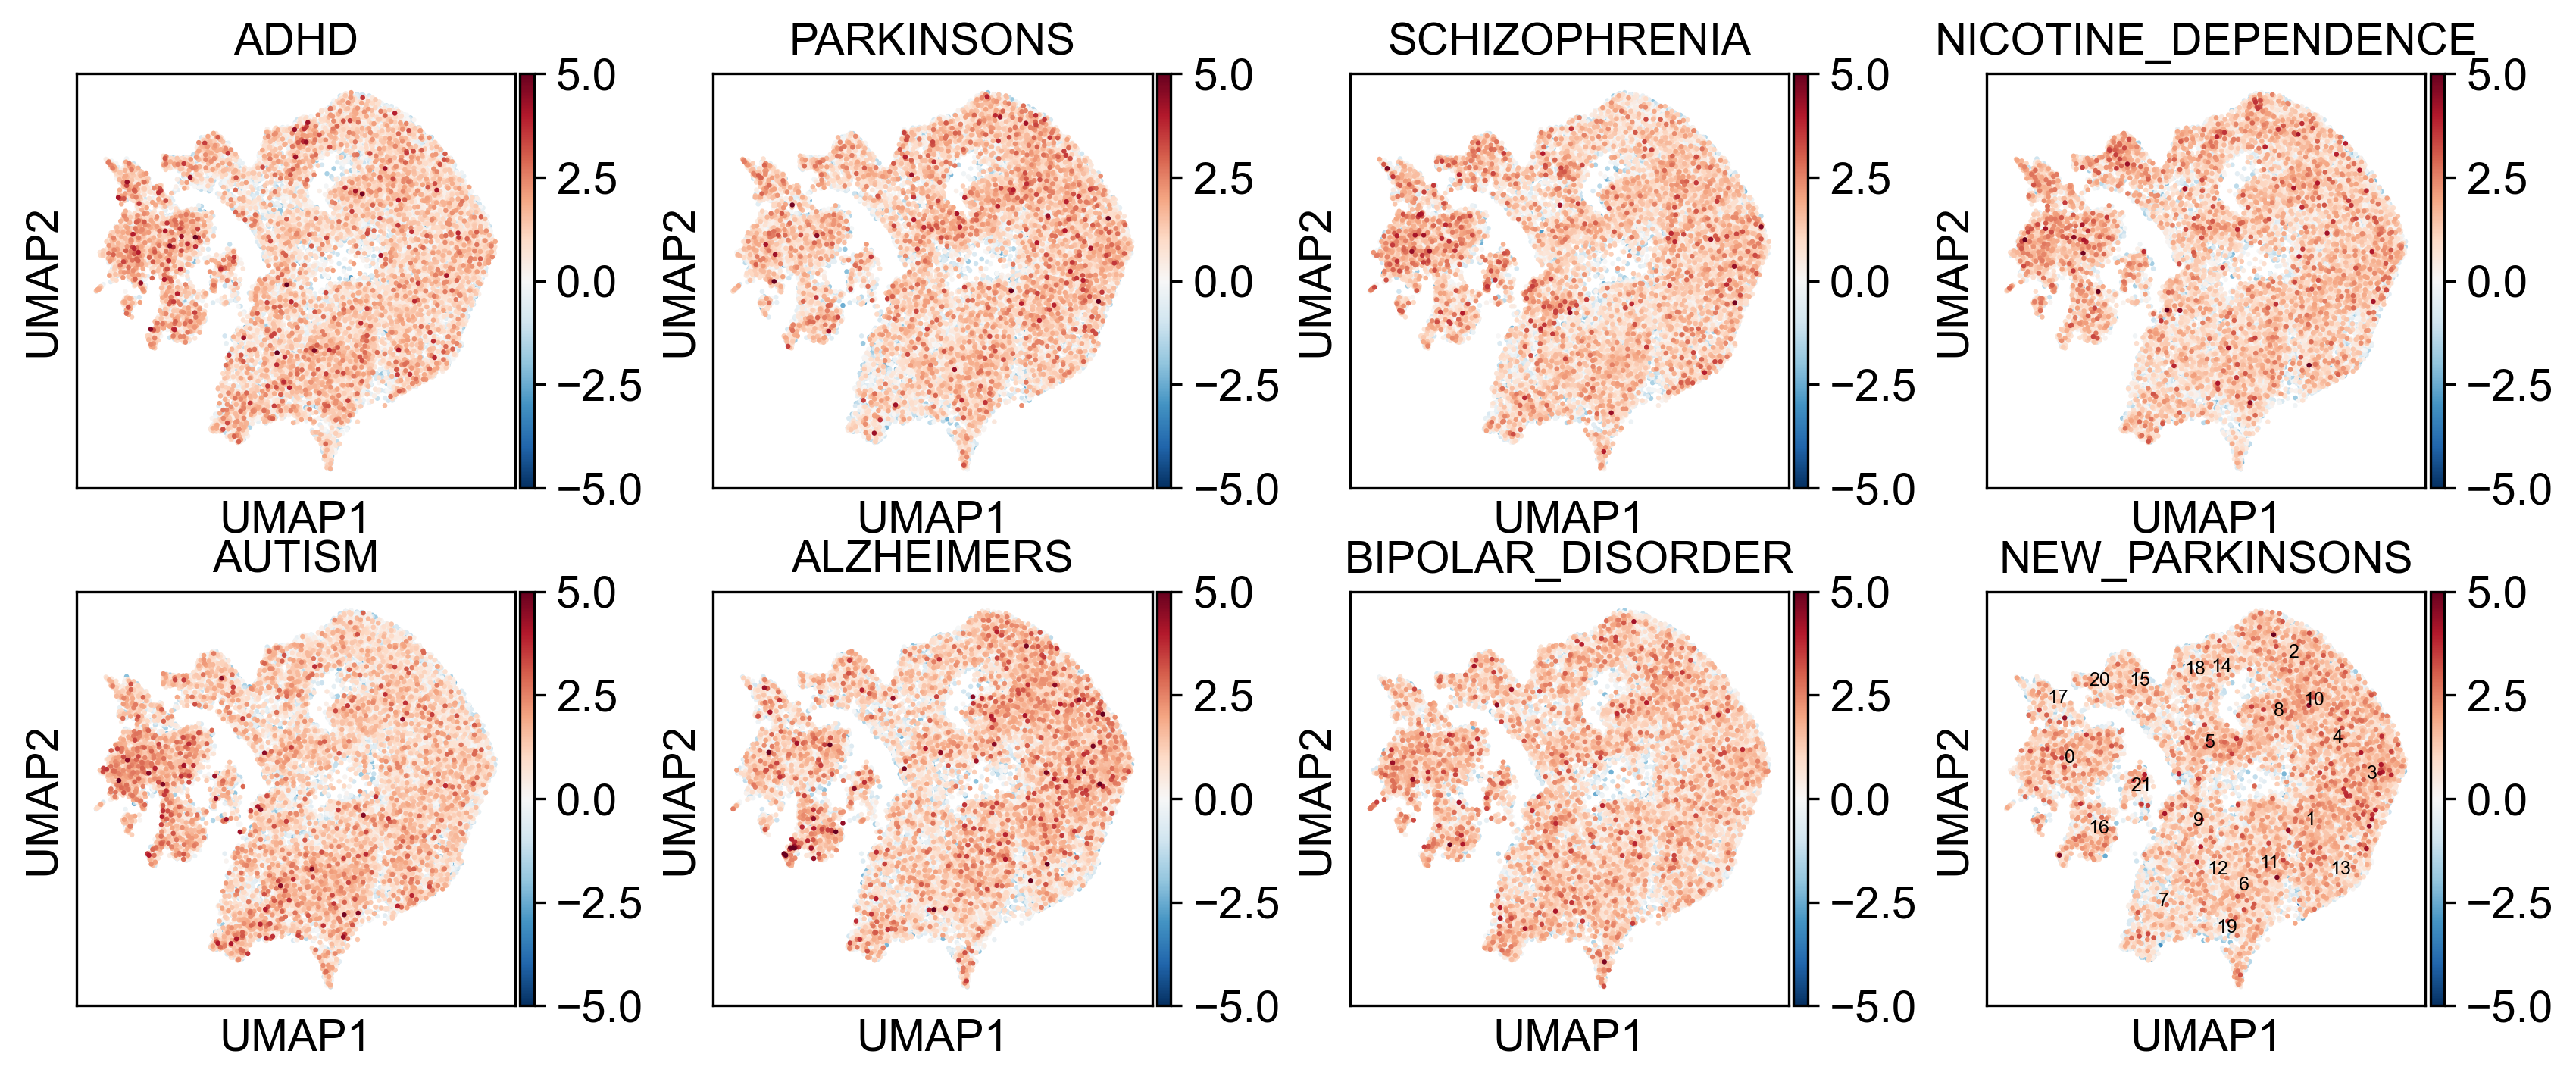

In [10]:
import seaborn as sns

#Generate a palette with seaborn
palette = sns.color_palette("tab10", n_colors=10)

#Convert the palette to hex format
palette_hex = palette.as_hex()

for trait in dict_df_score:
    adata.obs[trait] = dict_df_score[trait]["norm_score"]

sc.set_figure_params(figsize=[2.5, 2.5], dpi=150)
sc.pl.umap(
    adata,
    color="seurat_clusters",
    ncols=1,
    palette=palette_hex,
    title="Seurat Clusters"
)

plt.figure(figsize=(10, 10))
sc.pl.umap(
    adata,
    color=dict_df_score.keys(),
    color_map="RdBu_r",
    vmin=-5,
    vmax=5,
    s=10,
    show=False
)
#Overlay cluster labels on Parkinson's risk UMAP plot

#Add cluster labels
for cluster in adata.obs['seurat_clusters'].unique():
    x = adata[adata.obs['seurat_clusters'] == cluster].obsm['X_umap'][:, 0].mean()
    y = adata[adata.obs['seurat_clusters'] == cluster].obsm['X_umap'][:, 1].mean()
    plt.text(x, y, str(cluster), color='black', fontsize=6, weight='normal')

plt.show()

In [11]:
dict_df_score

{'ADHD':                       raw_score  norm_score   mc_pval      pval  nlog10_pval  \
 AAACCCAAGACGAGCT-1_1   0.004641   -1.581237  0.966034  0.953696     0.020590   
 AAACCCAAGCCTTTCC-1_1   0.049098    0.010576  0.478521  0.475130     0.323187   
 AAACCCACAAGGGTCA-1_1   0.111752    1.345273  0.091908  0.091988     1.036268   
 AAACCCACATCCTGTC-1_1   0.067362    1.565987  0.064935  0.064499     1.190448   
 AAACCCAGTAGGAGTC-1_1   0.046483    1.127813  0.131868  0.127889     0.893166   
 ...                         ...         ...       ...       ...          ...   
 TTTGTTGCAGCGAGTA-1_4   0.006607   -1.034973  0.861139  0.855222     0.067921   
 TTTGTTGCATTGCTTT-1_4  -0.045477    0.291432  0.376623  0.364979     0.437732   
 TTTGTTGGTAGAGATT-1_4   0.023616    0.729416  0.210789  0.220830     0.655942   
 TTTGTTGTCAATCCGA-1_4   0.037404    1.008873  0.167832  0.151832     0.818636   
 TTTGTTGTCTCTATGT-1_4  -0.026344   -0.768265  0.766234  0.777424     0.109342   
 
                  

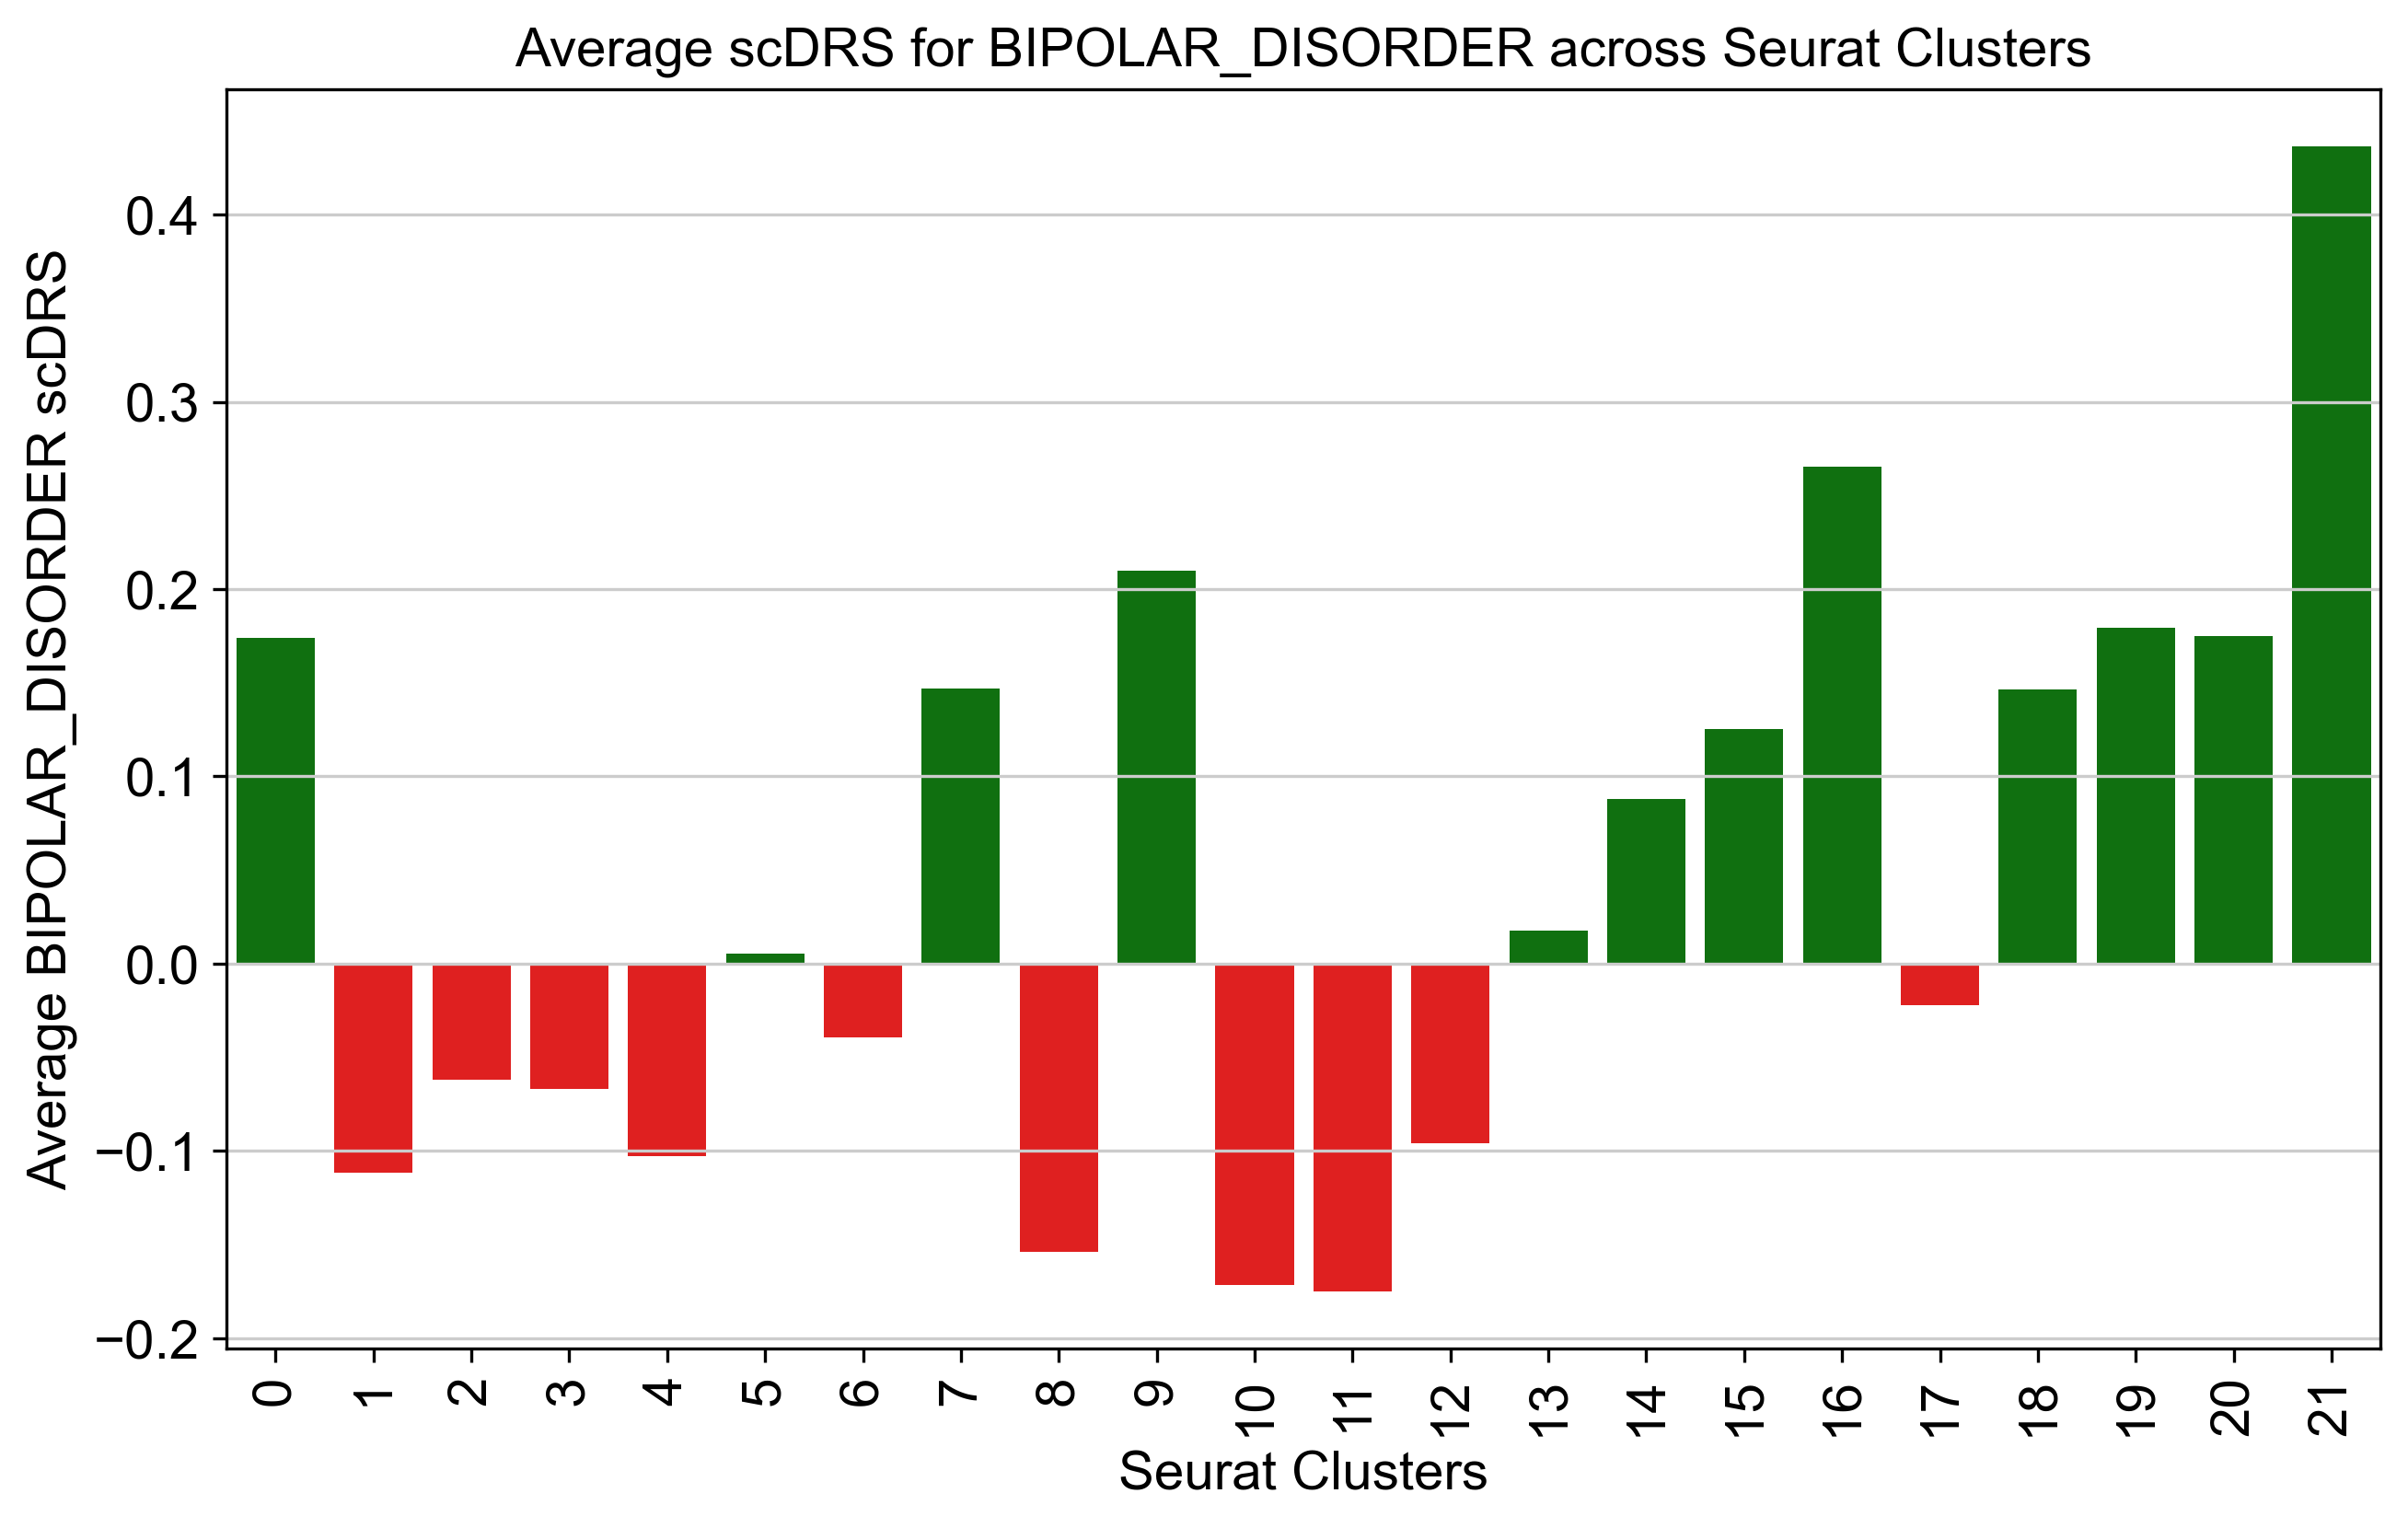

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

for trait in dict_df_score:
    adata.obs[trait] = dict_df_score[trait]["norm_score"]
    
#Calculate the mean scDRS score for each cluster
cluster_scores = adata.obs.groupby('seurat_clusters')['BIPOLAR_DISORDER'].mean().reset_index()

#Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
colors = ['red' if val < 0 else 'green' for val in cluster_scores['BIPOLAR_DISORDER']]
sns.barplot(x='seurat_clusters', y='BIPOLAR_DISORDER', data=cluster_scores, palette=colors)

#Add labels and title
plt.xlabel('Seurat Clusters')
plt.ylabel('Average BIPOLAR_DISORDER scDRS')
plt.title('Average scDRS for BIPOLAR_DISORDER across Seurat Clusters')
plt.xticks(rotation=90)

#Show the plot
plt.show()